# Proyek Analisis Data: [E-Commerce Public]
- **Nama:** [Aryanti Raihana Thamrin]
- **Email:** [aryantiraihana@gmail.com]
- **ID Dicoding:** [hanaaryanti]

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang memiliki rating review paling baik dan buruk?
- Apakah ada pola keterlambatan pengiriman berdasarkan kategori keterlambatan?

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip freeze requirements.txt

altair==5.5.0
anyio==4.8.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==3.0.0
async-lru==2.0.4
attrs==25.1.0
babel==2.17.0
beautifulsoup4==4.13.3
bleach==6.2.0
blinker==1.9.0
cachetools==5.5.2
certifi==2025.1.31
cffi==1.17.1
charset-normalizer==3.4.1
click==8.1.8
colorama==0.4.6
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.12
decorator==5.2.1
defusedxml==0.7.1
executing==2.2.0
fastjsonschema==2.21.1
fonttools==4.56.0
fqdn==1.5.1
gitdb==4.0.12
GitPython==3.1.44
h11==0.14.0
httpcore==1.0.7
httpx==0.28.1
idna==3.10
ipykernel==6.29.5
ipython==8.32.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.5
json5==0.10.0
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter==1.1.1
jupyter-console==6.6.3
jupyter-events==0.12.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server==2.15.0
jupyter_server_terminals==0.5.3
jupyterlab==4.3.5
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
jupyt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st

## Data Wrangling

### Gathering Data

In [4]:
reviews_df = pd.read_csv("data/order_reviews_dataset.csv", delimiter=",")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
orders_df = pd.read_csv("data/orders_dataset.csv", delimiter=",")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
items_df = pd.read_csv("data/order_items_dataset.csv", delimiter=",")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
products_df = pd.read_csv("data/products_dataset.csv", delimiter=",")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
product_translation_df = pd.read_csv("data/product_category_name_translation.csv", delimiter=",")
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- dataset order_reviews memiliki kolom review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp
- dataset orders memiliki kolom order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
- dataset items memiliki kolom order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value
- dataset products memiliki kolom product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm
- dataset product_translation_df memiliki kolom product_category_name dan product_category_name_english

### Assessing Data

In [9]:
# REVIEWS
reviews_df.info()
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())
reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi:  0


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [10]:
# ORDERS
orders_df.info()
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
# ITEMS
items_df.info()
print("Jumlah duplikasi: ", items_df.duplicated().sum())
items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [12]:
# PRODUCTS
products_df.info()
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [13]:
# PRODUCT TRANSLATION
product_translation_df.info()
print("Jumlah duplikasi: ", product_translation_df.duplicated().sum())
product_translation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


product_category_name            0
product_category_name_english    0
dtype: int64

**Insight:**

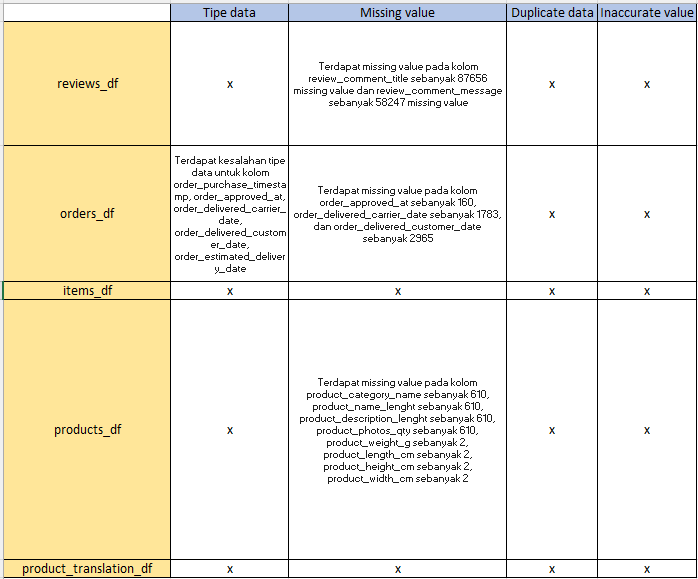

reviews_df
- Terdapat missing value pada kolom review_comment_title sebanyak 87656 missing value dan review_comment_message sebanyak 58247 missing value

orders_df
- Terdapat missing value pada kolom order_approved_at sebanyak 160, order_delivered_carrier_date	sebanyak 1783, dan order_delivered_customer_date sebanyak 2965
- Terdapat kesalahan tipe data untuk kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

products_df
- Terdapat missing value pada kolom product_category_name sebanyak 610, product_name_lenght	sebanyak 610, product_description_lenght sebanyak 610, product_photos_qty sebanyak 610, product_weight_g sebanyak 2, product_length_cm sebanyak 2, product_height_cm sebanyak 2, product_width_cm sebanyak 2

### Cleaning Data

In [14]:
#REVIEWS
reviews_df[reviews_df.review_comment_title.isna()]
reviews_df.fillna(value="No Title", inplace=True)
reviews_df.isna().sum()
# reviews_df.info()

#ORDERS
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df = orders_df[orders_df['order_status'] != 'canceled']
print(orders_df['order_status'].unique())
orders_df = orders_df.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'], how='any')
orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].fillna(orders_df["order_approved_at"])
orders_df["order_approved_at"] = orders_df["order_approved_at"].fillna(orders_df["order_purchase_timestamp"])
orders_df[orders_df.order_approved_at.isna()]
orders_df.info()

#PRODUCTS
products_df[products_df.product_category_name.isna()]
products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], how='all', inplace=True)
products_df[products_df.product_weight_g.isna()]
products_df['product_weight_g'] = products_df.groupby('product_category_name')['product_weight_g'].transform(lambda x: x.fillna(x.median()))
products_df['product_length_cm'] = products_df.groupby('product_category_name')['product_length_cm'].transform(lambda x: x.fillna(x.median()))
products_df['product_height_cm'] = products_df.groupby('product_category_name')['product_height_cm'].transform(lambda x: x.fillna(x.median()))
products_df['product_width_cm'] = products_df.groupby('product_category_name')['product_width_cm'].transform(lambda x: x.fillna(x.median()))
products_df.isna().sum()


['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'created'
 'approved']
<class 'pandas.core.frame.DataFrame'>
Index: 96470 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_status                   96470 non-null  object        
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_approved_at              96470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96470 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96470 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

```
df_orders_cleaned = orders_df[orders_df['order_status'] != 'canceled']
```

digunakan untuk menyimpan baris data yang memiliki order_status selain canceled

```
orders_df = orders_df.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'], how='any')
```

berfungsi untuk menghapus baris data yang memiliki value NaT pada salah satu dari dua kolom yang terdapat di dalam subset

```
orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].fillna(orders_df["order_approved_at"])
```
kode ini mengasumsikan bahwa pesanan segera dikirim setelah pembayaran disetujui

```
orders_df["order_approved_at"] = orders_df["order_approved_at"].fillna(orders_df["order_purchase_timestamp"])
```

kode ini mengasumsikan bahwa pembayaran langsung disetujui setelah pembelian


```
products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], how='all', inplace=True)
```
digunakan untuk menghilangkan di products_df yang di mana datanya memang kosong sepenuhnya pada kolom yang tertera pada subset.

```
products_df['product_weight_g'] = products_df.groupby('product_category_name')['product_weight_g'].transform(lambda x: x.fillna(x.median()))
products_df['product_length_cm'] = products_df.groupby('product_category_name')['product_length_cm'].transform(lambda x: x.fillna(x.median()))
products_df['product_height_cm'] = products_df.groupby('product_category_name')['product_height_cm'].transform(lambda x: x.fillna(x.median()))
products_df['product_width_cm'] = products_df.groupby('product_category_name')['product_width_cm'].transform(lambda x: x.fillna(x.median()))
```
digunakan untuk mengganti nilai NaN pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm dengan median berdasarkan kategori produk.

**Insight:**
- pada awalnya kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date bertipe data object, kemudian diubah menjadi datetime
- missing value di orders_df ada yang disebabkan karena order tersebut memiliki status 'canceled' sehingga memang tidak memiliki value untuk kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.

## Exploratory Data Analysis (EDA)

### Explore ...

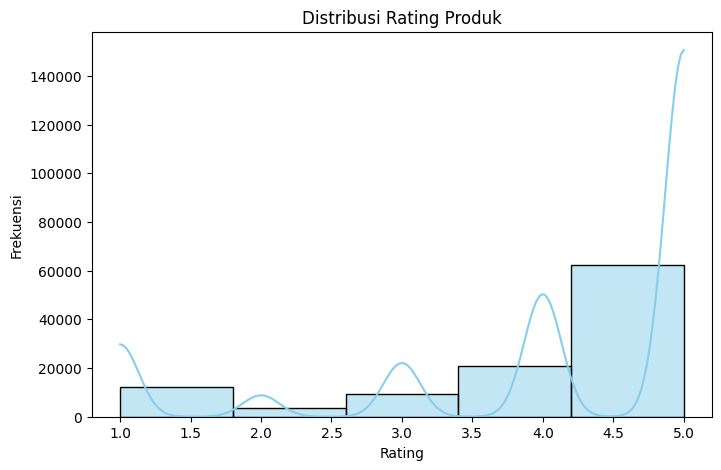

C:\Users\Hana\AppData\Local\Temp\ipykernel_11712\2423450117.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


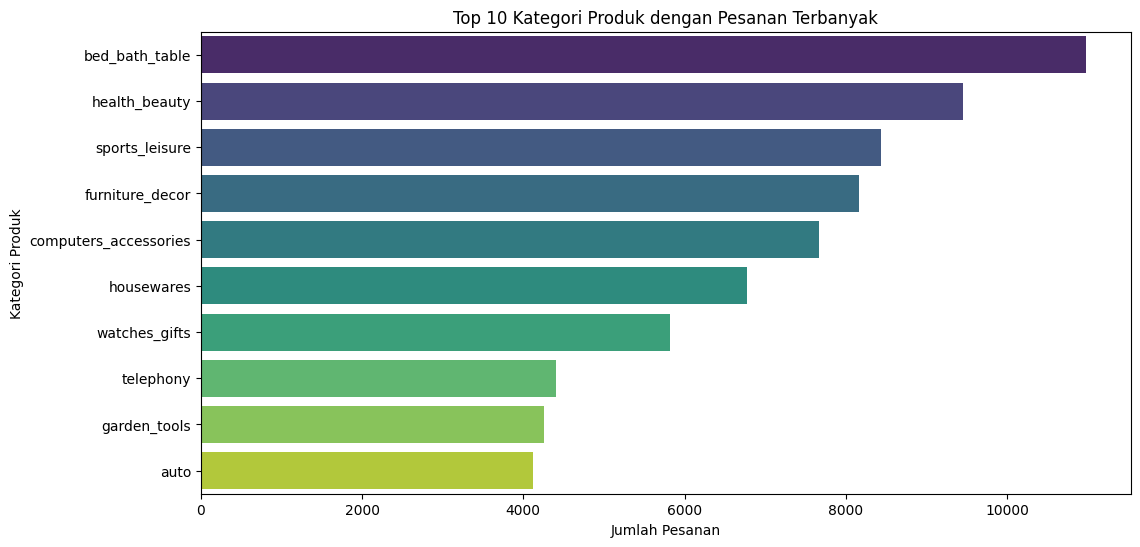

C:\Users\Hana\AppData\Local\Temp\ipykernel_11712\2423450117.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df["delivery_delay_days"], y=final_df["review_score"], palette="coolwarm")


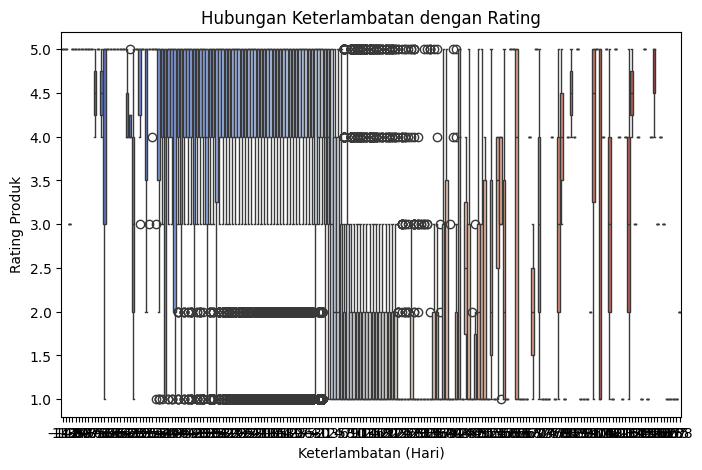

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,delivery_delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,-8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,-6
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,...,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,-13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,...,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,-10


In [15]:
orders_reviews_df = pd.merge(
    left=orders_df,
    right=reviews_df,
    how="inner",
    on="order_id"
)
# orders_reviews_df.head()

orders_reviews_items_df = pd.merge(
    left=orders_reviews_df,
    right=items_df,
    how="inner",
    on="order_id"
)
# orders_reviews_items_df.head()

orders_reviews_items_products_df = pd.merge(
    left=orders_reviews_items_df,
    right=products_df,
    how="inner",
    on="product_id"
)
# orders_reviews_items_products_df.head()

final_df = pd.merge(
    left=orders_reviews_items_products_df,
    right=product_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

plt.figure(figsize=(8, 5))
sns.histplot(final_df["review_score"], bins=5, kde=True, color="skyblue")
plt.title("Distribusi Rating Produk")
plt.xlabel("Rating")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(12, 6))
top_categories = final_df["product_category_name_english"].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Kategori Produk dengan Pesanan Terbanyak")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Kategori Produk")
plt.show()

final_df["order_delivered_customer_date"] = pd.to_datetime(final_df["order_delivered_customer_date"])
final_df["order_estimated_delivery_date"] = pd.to_datetime(final_df["order_estimated_delivery_date"])
final_df["delivery_delay_days"] = (final_df["order_delivered_customer_date"] - final_df["order_estimated_delivery_date"]).dt.days

plt.figure(figsize=(8, 5))
sns.boxplot(x=final_df["delivery_delay_days"], y=final_df["review_score"], palette="coolwarm")
plt.title("Hubungan Keterlambatan dengan Rating")
plt.xlabel("Keterlambatan (Hari)")
plt.ylabel("Rating Produk")
plt.show()

final_df.to_csv("final_data.csv", index=False)

final_df.head()



**Insight:**
- dataset final merupakan tabel akhir atau hasil dari merge antara 5 dataset

## Visualization & Explanatory Analysis

In [16]:
final_df = pd.read_csv("dashboard/final_data.csv")

### Pertanyaan 1: Kategori produk apa yang memiliki rating review paling baik dan buruk?

C:\Users\Hana\AppData\Local\Temp\ipykernel_11712\1386362526.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_rating", y="product_category_name_english", data=top_10_best, palette="Blues_r", ax=ax[0])
C:\Users\Hana\AppData\Local\Temp\ipykernel_11712\1386362526.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_rating", y="product_category_name_english", data=top_10_worst, palette="Reds_r", ax=ax[1])


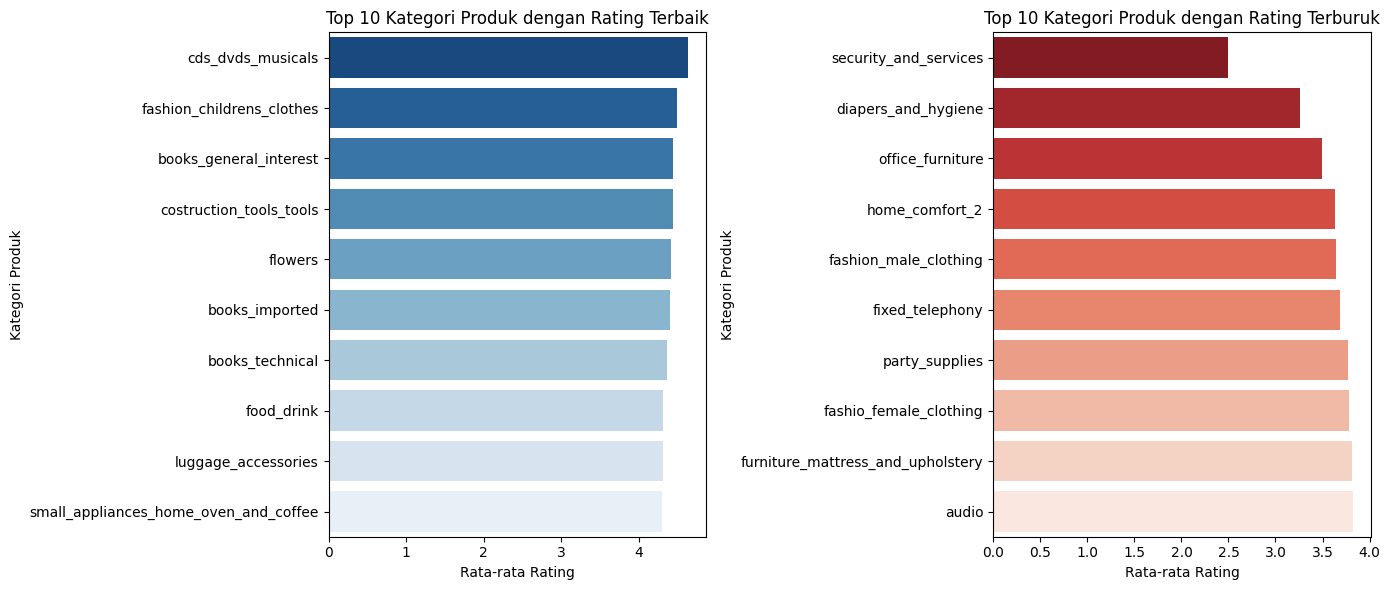

In [17]:
rating_per_category = final_df.groupby("product_category_name_english").agg(
    avg_rating=("review_score", "mean")
).reset_index()

top_10_best = rating_per_category.sort_values(by="avg_rating", ascending=False).head(10)
top_10_worst = rating_per_category.sort_values(by="avg_rating", ascending=True).head(10)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x="avg_rating", y="product_category_name_english", data=top_10_best, palette="Blues_r", ax=ax[0])
ax[0].set_title("Top 10 Kategori Produk dengan Rating Terbaik")
ax[0].set_xlabel("Rata-rata Rating")
ax[0].set_ylabel("Kategori Produk")

sns.barplot(x="avg_rating", y="product_category_name_english", data=top_10_worst, palette="Reds_r", ax=ax[1])
ax[1].set_title("Top 10 Kategori Produk dengan Rating Terburuk")
ax[1].set_xlabel("Rata-rata Rating")
ax[1].set_ylabel("Kategori Produk")

plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah ada pola keterlambatan pengiriman berdasarkan kategori keterlambatan?

C:\Users\Hana\AppData\Local\Temp\ipykernel_11712\2419381969.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_agg = final_df.groupby("delivery_category").agg(
C:\Users\Hana\AppData\Local\Temp\ipykernel_11712\2419381969.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_category_agg = final_df.groupby(["product_category_name_english", "delivery_category"]).agg(


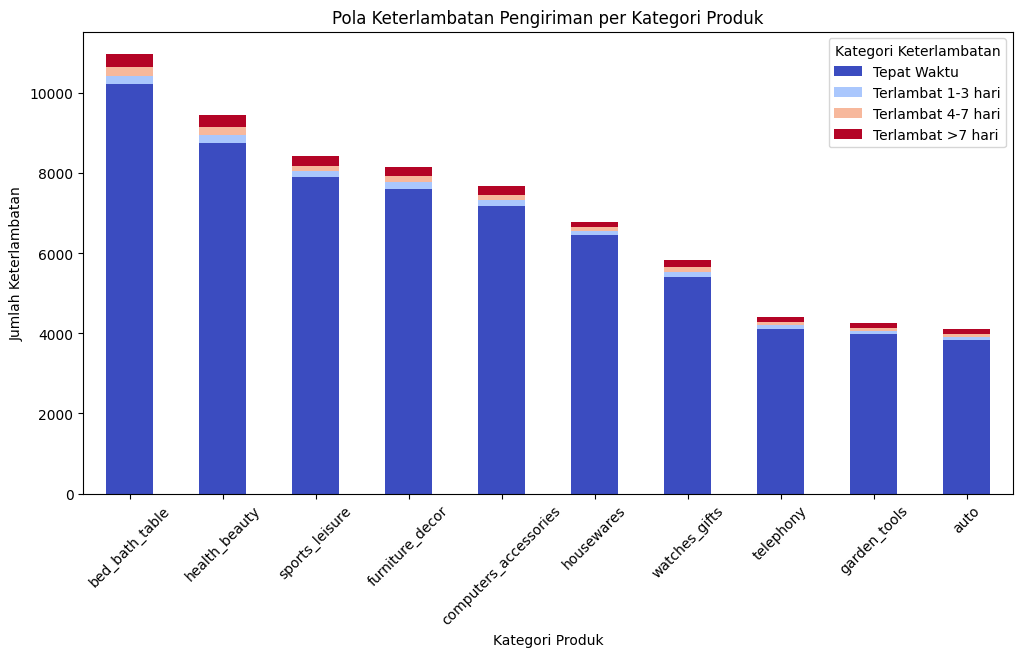

In [18]:
final_df["order_delivered_customer_date"] = pd.to_datetime(final_df["order_delivered_customer_date"])
final_df["order_estimated_delivery_date"] = pd.to_datetime(final_df["order_estimated_delivery_date"])

final_df["delivery_delay_days"] = (final_df["order_delivered_customer_date"] - final_df["order_estimated_delivery_date"]).dt.days

bins = [-999, 0, 3, 7, 999]
labels = ["Tepat Waktu", "Terlambat 1-3 hari", "Terlambat 4-7 hari", "Terlambat >7 hari"]
final_df["delivery_category"] = pd.cut(final_df["delivery_delay_days"], bins=bins, labels=labels)

# by kategori keterlambatan
delay_agg = final_df.groupby("delivery_category").agg(
    total_orders=("order_id", "count")
).reset_index()

# by kategori product
delay_category_agg = final_df.groupby(["product_category_name_english", "delivery_category"]).agg(
    total_orders=("order_id", "count")
).reset_index()

delay_counts = delay_category_agg.pivot(index="product_category_name_english", columns="delivery_category", values="total_orders").fillna(0)

top_10_categories = delay_counts.sum(axis=1).nlargest(10).index
delay_counts_top10 = delay_counts.loc[top_10_categories]

# Plot
delay_counts_top10.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Keterlambatan")
plt.title("Pola Keterlambatan Pengiriman per Kategori Produk")
plt.legend(title="Kategori Keterlambatan")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!streamlit run dashboard/app.py

**Insight:**
- 10 kategori dengan rating terbaik secara berturut-turut yaitu fashion_childrens_clothes, cds_dvds_musicals, books_general_interest, books_imported, construction_tools_tools, small_appliances_home_oven_and_coffee, flowers, books_technical, food_drink, fashion_sport.
- 10 kategori dengan rating terburuk yaitu furniture_mattress_and_upholstery, home_confort, dan party_supplies, audio, fixed_telephony, home_comfort_2, office_furniture, diapers_and hygine, security_and_service.

## Conclusion

- Kategori dengan rating terbaik yaitu fashion_childrens_clothes menunjukkan bahwa konsumen merasa puas dengan produk-produk dalam kategori tersebut. 
- Kategori dengan rating terburuk yaitu furniture_mattress_and_upholstery dimungkinkan karena adanya masalah pada kualitas produk, layanan atau hal lain yang berkaitan dengan kepuasan pelanggan.